# Analysis

In [ ]:
## Overview:
###In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

### In the data sets that were given there were two sets of data that needed to merged into one “Clean Data Frame” set. From there it was asked to find the duplicate Mouse ID’s and then delete them from the data frame. Subsequenlty this drops the number of mice in the study to 248.

### In the Summary Statistics Section I was asked to find the mean, median, variance, standard deviation and SEM of the tumor volume based on the 10 drugs used in the study and create a new data frame labeled “Summary Statistics”. It can be determined from this data that Ramicane had the lowest mean tumor volume, while Ketapril had the highest mean tumor volume. The bar charts allow the viewer to see the “# of Observed Mouse Timepoints” for each regimen. This section also allows us to see the percentage breakdown of male to female mice used in the study. There were more males (51%) used in this study than females (49%).

### The Quartiles, Outliers and Boxplots sections allows the viewer to see four different regimens used in the study. The boxplot highlights the drugs "Capomulin, Ramicane", Infubinol", Ceftamin". The boxplot supports that Ramicane has the lowest tumor volumes, while out of the four other drugs called upon; Infubinol has the highest tumor volumes and has the potential outliers of 36.321346.

### The Line Plot data allows the viewer to see the tumor volume of a specific mouse being given Capomulin over a period of time in the study and shows the final tumor has decreased in size. The Scatter Plots allows the viewer to see the mouse weight versus the average observed tumor volume. It can be seen that the heavier the mouse the tumor volume increases.

### The correlation and linear regression graph allow the viewer to see the mouse weight and average observed tumor volume drug regimen Capomulin. The correlation between mouse weight and the average tumor volume is 0.84.


In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [89]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

In [113]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [114]:
# Combine the data into a single DataFrame

# Display the data table for preview
mouse_metadata_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

In [115]:
mouse_metadata_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [116]:
# Checking the number of mice.
mouse_count = len(mouse_metadata_complete["Mouse ID"].unique())
mouse_count

249

In [117]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ids = mouse_metadata_complete[mouse_metadata_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
unique_duplicated_ids =duplicated_ids["Mouse ID"].unique()

In [118]:
unique_duplicated_ids

array(['g989'], dtype=object)

In [119]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_metadata_complete [mouse_metadata_complete ["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_metadata_complete = mouse_metadata_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_mouse_metadata_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [128]:
clean_mouse_metadata_complete = clean_mouse_metadata_complete [clean_mouse_metadata_complete ["Mouse ID"] != "g989"]
clean_mouse_metadata_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [129]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_metadata_complete.drop(clean_mouse_metadata_complete[clean_mouse_metadata_complete["Mouse ID"] == "g989"].index)

In [131]:
clean_mouse_count["Mouse ID"].nunique()

248

# Summary Statistics

In [134]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_mean = clean_mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_regimen_median = clean_mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_regimen_variance = clean_mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_regimen_std = clean_mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_regimen_sem = clean_mouse_metadata_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [135]:
# drug_regimen_mean
# drug_regimen_median
# drug_regimen_variance
# drug_regimen_std
# drug_regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [136]:
summary_statistics = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean,
                                  "Median Tumor Volume": drug_regimen_median,
                                  "Tumor Volume Variance": drug_regimen_variance,
                                  "Tumor Volume Std. Dev.": drug_regimen_std,
                                  "Tumor Volume Std. Err.": drug_regimen_sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [145]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = clean_mouse_metadata_complete.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [162]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = clean_mouse_metadata_complete["Drug Regimen"].value_counts()
#drug_regimen_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

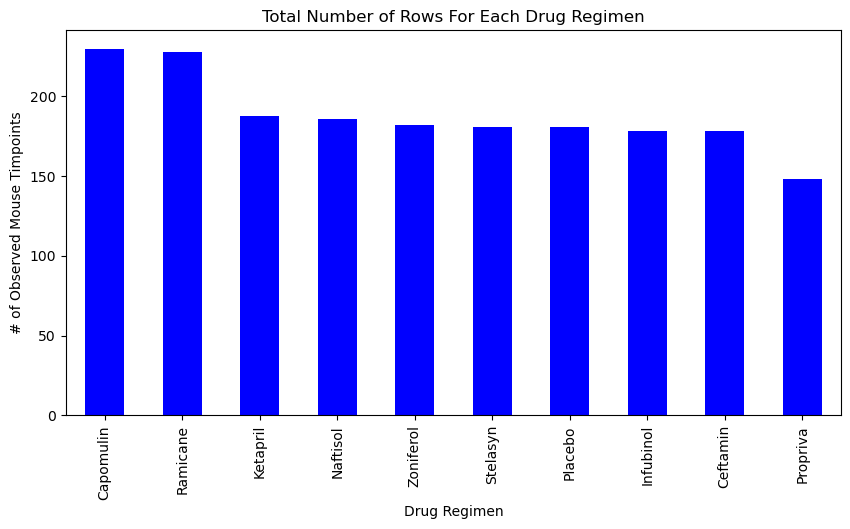

In [222]:
drug_regimen_count.plot(kind="bar", figsize=(10,5), color="blue")
plt.title("Total Number of Rows For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")
plt.xticks(rotation = 90)
plt.show()

In [183]:
#clean_mouse_metadata_complete.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

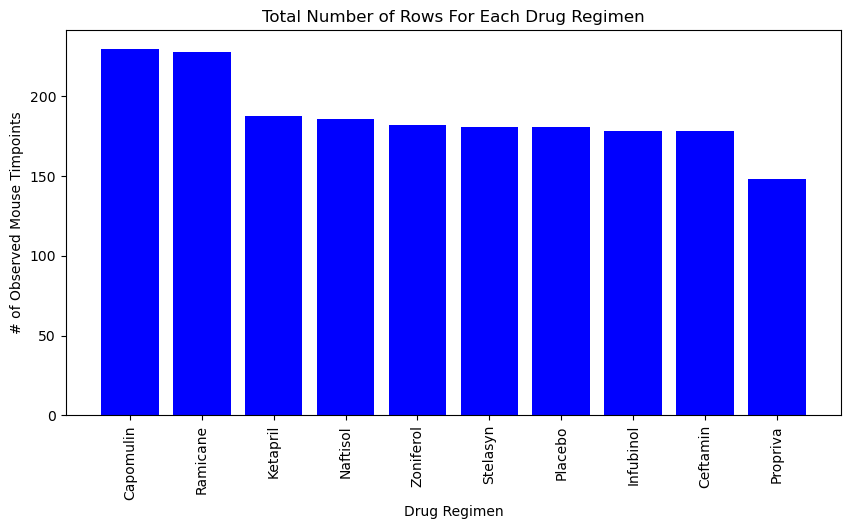

In [375]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_regimen_count.reset_index()["Drug Regimen"]
plt.figure(figsize = (10,5))
plt.bar(x_axis, drug_regimen_count, color="blue", align = "center")
plt.title("Total Number of Rows For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")
plt.xticks (rotation = 90)
plt.show()

<Axes: ylabel='Sex'>

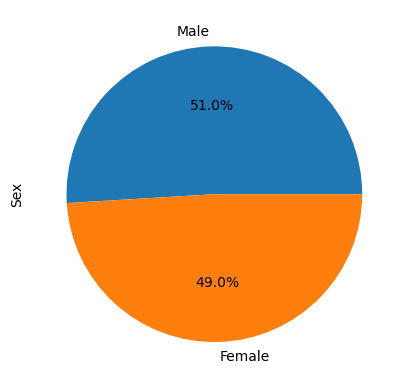

In [524]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_mouse_metadata_complete["Sex"].value_counts()
sex_count.plot(kind="pie", autopct = "%1.1f%%", ylabel="Sex")

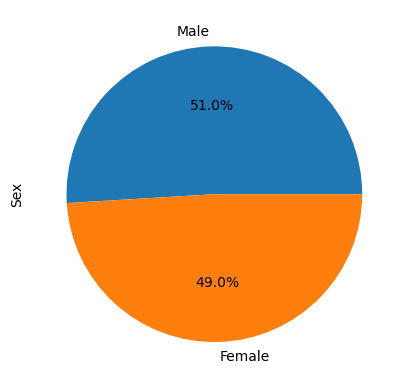

In [379]:
plt.pie(clean_mouse_metadata_complete["Sex"].value_counts(),
        labels = ["Male", "Female"],
        # colors = ["blue", "orange"],
        autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [341]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

four_treatment_regimen = clean_mouse_metadata_complete[clean_mouse_metadata_complete["Drug Regimen"].isin(treatments)] 

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_treatment_regimen.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, four_treatment_regimen, how="left", on=["Mouse ID", "Timepoint"])
#final_tumor_volume

In [351]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes= final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles =  tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    upper_bounds = upper_quartile + (1.5 * iqr)
    lower_bounds = lower_quartile - (1.5 * iqr)

    # print (f"Lower quartile {treatment}: treatment is {lower_quartile}")
    # print (f"Upper quartile {treatment}: treatment is {upper_quartile}")
    # print (f"IQR {treatment}: treatmet is {iqr}")
    # print (f"Below {lower_bounds}: could be {treatment} outliers.")
    # # print (f"Above {upper_bounds}: could be {treatment} outliers.\n")
    
    outliers = (tumor_volumes < lower_bounds) | (tumor_volumes > upper_bounds) 
    print(f"{treatment}'s potential outliers: {tumor_volumes[outliers]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


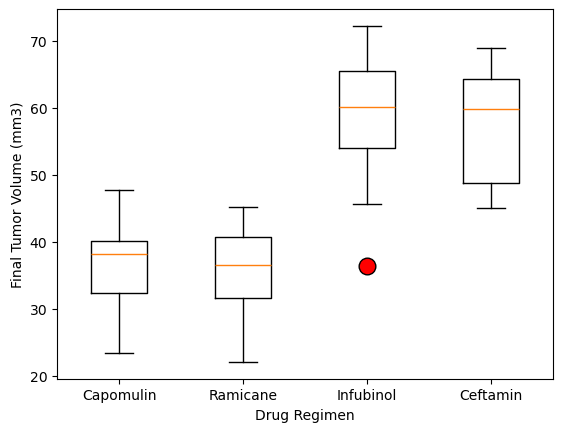

In [402]:
# # Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=12)
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

# Line and Scatter Plots

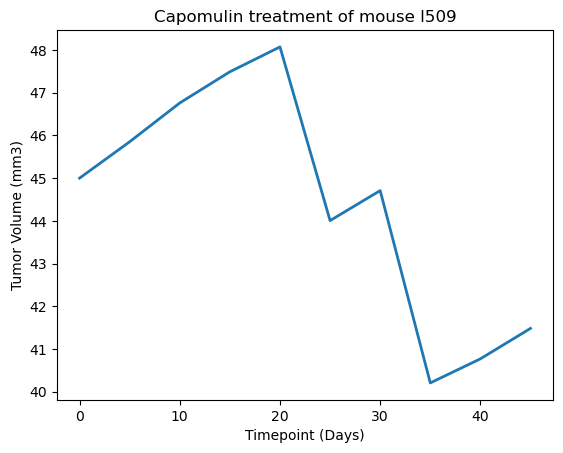

In [431]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = clean_mouse_metadata_complete.loc[clean_mouse_metadata_complete["Mouse ID"] == "l509", :]
# line_plot
x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, linewidth=2, markersize=10)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

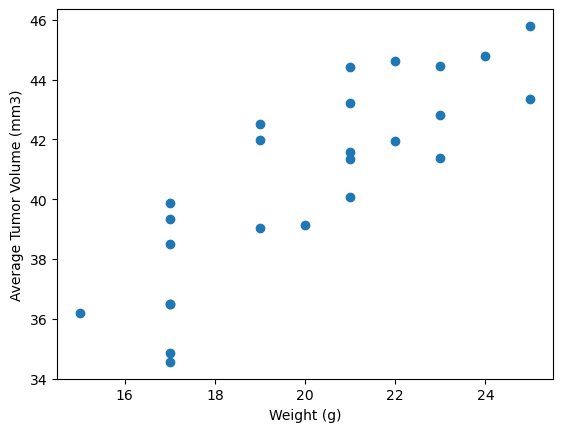

In [473]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
compomulin_regimen = clean_mouse_metadata_complete.loc[clean_mouse_metadata_complete["Drug Regimen"] == "Capomulin", :]
# compomulin_regimen
mouse_weight = compomulin_regimen.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_volume = compomulin_regimen.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
x_axis = mouse_weight
y_axis = avg_tumor_volume
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Correlation and Regression 

In [477]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = round(st.pearsonr(x_axis,y_axis).statistic, 2)  #correlation_coefficeient >>>p_value = st.pearsonr(x,y)
#correlation_coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

The correlation between mouse weight and the average tumor volume is 0.84


In [479]:
linear_regression = st.linregress(x_axis, y_axis)
# linear_regression

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

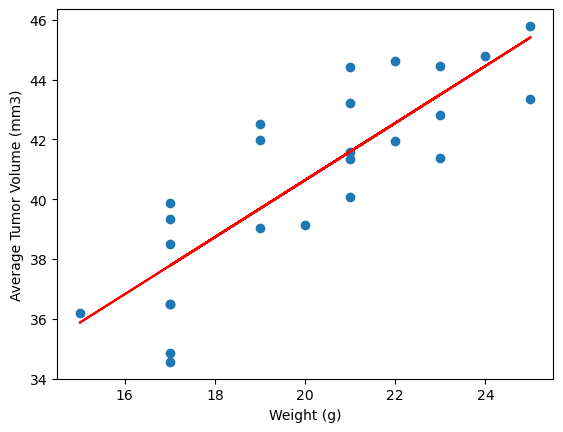

In [521]:
y_pred = linear_regression.intercept + (linear_regression.slope * mouse_weight)
y_pred
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, y_pred, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()